In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import time
import datetime
import matplotlib.dates as mdates
from matplotlib.patches import Patch


COLORS = ['#0077BE', '#FF6B35', "#32CD32"]

In [2]:
df = pd.read_csv("processed_data.csv", index_col= 0, parse_dates= True)
df["Costs"] = df.Consumption * df.Preis / 1000
df["Predicted Costs"] = df.Pred * df.Preis / 1000

df.isna().sum()

Production            0
Purchased             0
FeedIn                0
Consumption           0
SelfConsumption       0
Pred               7008
data                  0
Preis                 1
Costs                 1
Predicted Costs    7009
dtype: int64

In [9]:



# def get_costs_over_days(df):
#     return df.groupby(df.index.date).agg(
#         {"Consumption": "sum", "Costs": "sum", "Preis": "mean"}
#     )

In [4]:

# last_week = cut - datetime.timedelta(weeks=1)
# wanted = get_costs_over_days(before[last_week:])
# wanted.plot()
# plt.title("Last Week")

In [5]:
# last_week = cut - datetime.timedelta(days = 31)
# wanted = get_costs_over_days(before[last_week:])
# wanted.plot()
# plt.title("Last Month")

In [7]:
# last_week = cut - datetime.timedelta(days=1)
# wanted = before[last_week:][
#     [
#         "Consumption",
#         "Costs",
#         "Preis",
#     ]
# ]
# wanted.plot()

In [8]:
# plt.figure(figsize=(10, 4))

# last_week = cut - datetime.timedelta(days=1)
# wanted = before[last_week:][ [ "Consumption", "Costs", "Preis",]].copy()
# ax = plt.subplot(1,2,1)
# wanted.plot(ax=ax)

# ax2 = plt.subplot(1,2,2)


# one_day = after.index[0] + datetime.timedelta(days=1)
# wanted = after.loc[:one_day].copy()
# vals =wanted.Preis.values
# vals[10:18] = [15, 20, 23,27, 40, 45, 62, 70]
# wanted.Preis = vals

# wanted["Predicted Costs"] = wanted.Pred * wanted.Preis / 1000



# wanted["Morfed"] = wanted.Preis * (wanted.Pred.sum() / wanted.Preis.sum())

# wanted[ [ "Pred", "Predicted Costs", "Preis",]].plot(ax = ax2)
# plt.show()

In [10]:
before = df.loc[df.Pred.isna()]
after = df.loc[df.Pred.notna()]

cut = before.index[-1]

together = pd.concat(
[    before.iloc[-10:] ,
    after.iloc[:10]]
)

together = together.rename(columns={"Pred":"Predicted Consumption"})

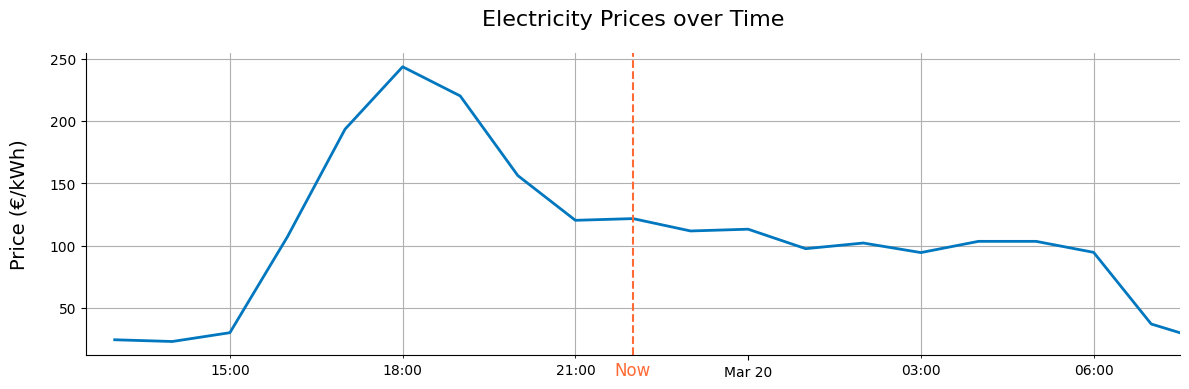

In [53]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)

# Plotting the data with a beautiful shade of blue
ax.plot(together.index, together.Preis, color=COLORS[0], lw=2)

# Y-axis label
ax.set_ylabel("Price (€/kWh)", fontsize=14, labelpad=15)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[1], lw=1.5)
ax.text(now, 0, 'Now', color=COLORS[1], ha='center', va='center', rotation=0, fontsize=12)

# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

# Title
ax.set_title("Electricity Prices over Time", fontsize=16, pad=20)

# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("imgs/Preis_eng.svg")
plt.show()

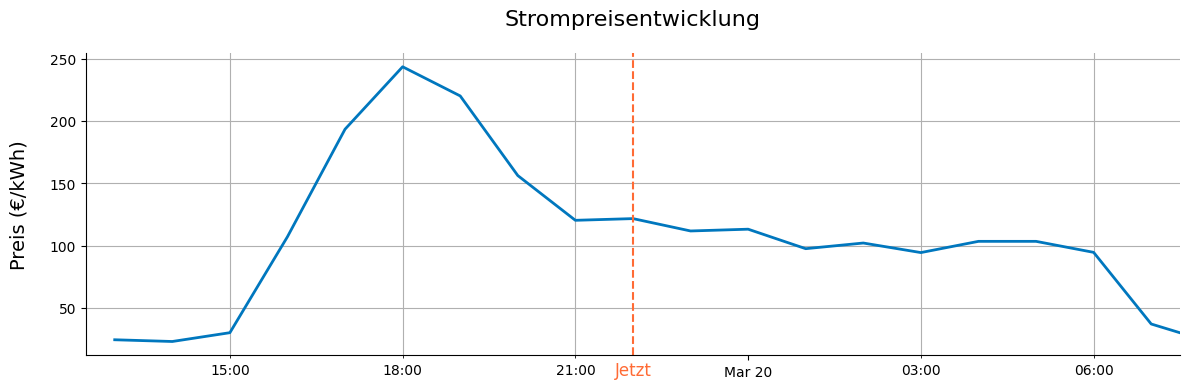

In [55]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)

# Daten plotten mit einem schönen Blauton
ax.plot(together.index, together.Preis, color=COLORS[0], lw=2)

# Y-Achsen-Beschriftung
ax.set_ylabel("Preis (€/kWh)", fontsize=14, labelpad=15)

# X-Achse mit besserem Format einrichten und Labels drehen für bessere Klarheit
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Eine gepunktete vertikale Linie bei 'jetzt' hinzufügen
ax.axvline(x=now, linestyle='--', color=COLORS[1], lw=1.5)
ax.text(now, 0, 'Jetzt', color=COLORS[1], ha='center', va='center', rotation=0, fontsize=12)

# Den Plot um 'jetzt' zentrieren
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

# Titel
ax.set_title("Strompreisentwicklung", fontsize=16, pad=20)

# Spines (der Kasten um den Plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("imgs/Preise.svg")
plt.show()


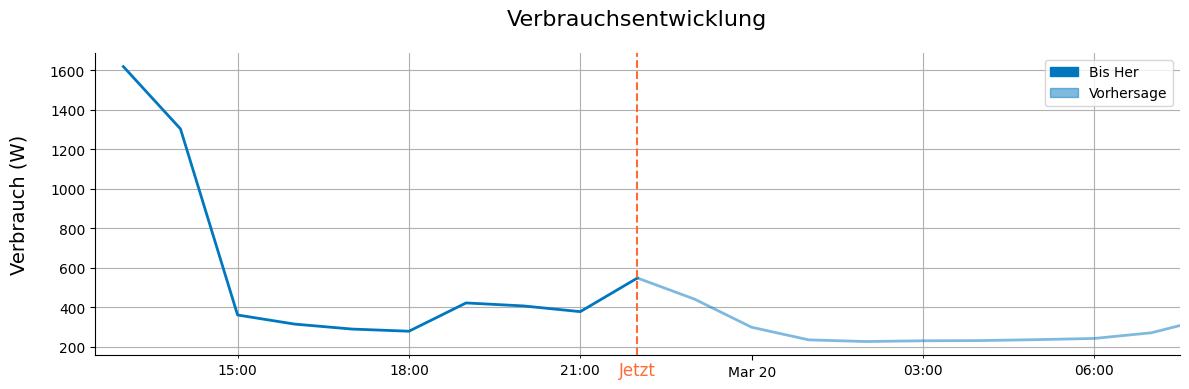

In [58]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)


# Plotting the data with a beautiful shade of blue
# Plotting the actual consumption before 'now' with a solid line
ax.plot(together.loc[:now].index, together.loc[:now].Consumption, color=COLORS[0], lw=2, label='Consumption')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours= 1)

# Plotting the predicted consumption after 'now' with a dashed line
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Consumption'], 
        color=COLORS[0], 
        lw=2, 
        label='Pred',
        alpha = 0.5)


# Y-axis label
ax.set_ylabel("Verbrauch (W)", fontsize=14, labelpad=15)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[1], lw=1.5)
ax.text(now, -0.048, 'Jetzt', color=COLORS[1], ha='center', va='center', rotation=0, fontsize=12, transform=ax.get_xaxis_transform())


# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

ax.set_title("Verbrauchsentwicklung", fontsize=16, pad=20)
legend_elements = [Patch(facecolor=COLORS[0], edgecolor=COLORS[0], label='Bis Her'),
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], alpha=0.5, label='Vorhersage')]
ax.legend(handles=legend_elements, loc='upper right',)

# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("imgs/Consumption.svg", bbox_inches = "tight")
plt.show()

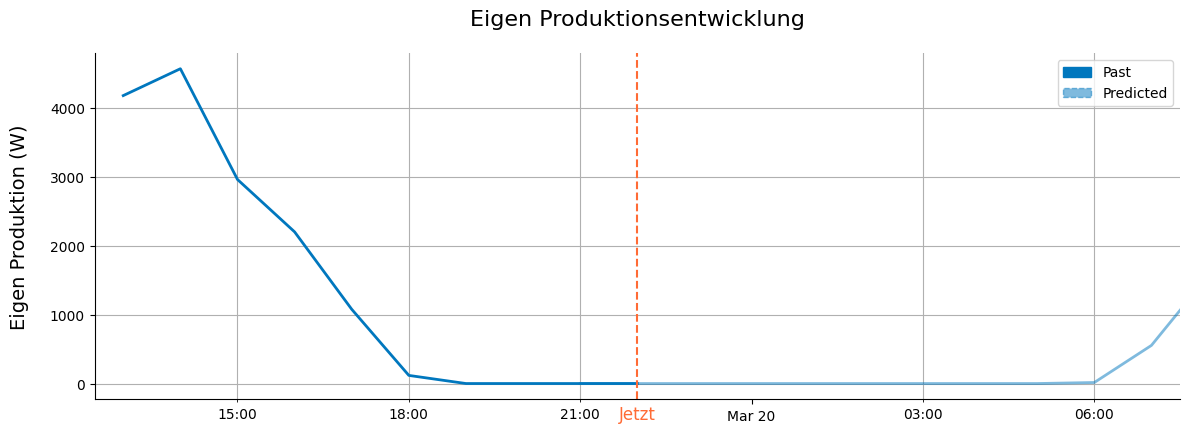

In [60]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)


# Plotting the data with a beautiful shade of blue
ax.plot(together.loc[:now].index, together.loc[:now].Production, color=COLORS[0], lw=2, label='Production')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours= 1)

# Assuming you're faking the "Predicted Production" to be the same as "Production" just for visualization
together['Predicted Production'] = together.Production

# Plotting the predicted production after 'now' with a dashed line and reduced opacity
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Production'], 
 color=COLORS[0], 
        lw=2, 
        label='Pred',
        alpha = 0.5)




# Y-axis label
ax.set_ylabel("Eigen Produktion (W)", fontsize=14, labelpad=15)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[1], lw=1.5)
ax.text(now, -0.042, 'Jetzt', color=COLORS[1], ha='center', va='center', rotation=0, fontsize=12, transform=ax.get_xaxis_transform())

# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

# Updated legend to include the Production and Predicted Production entries
legend_elements = [
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], label='Past'),
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], linestyle='--', alpha=0.5, label='Predicted')]
ax.legend(handles=legend_elements, loc='upper right',)

# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
ax.set_title("Eigen Produktionsentwicklung", fontsize=16, pad=20)

plt.savefig("imgs/Produktionsentwicklung.svg", bbox_inches = "tight")
plt.show()

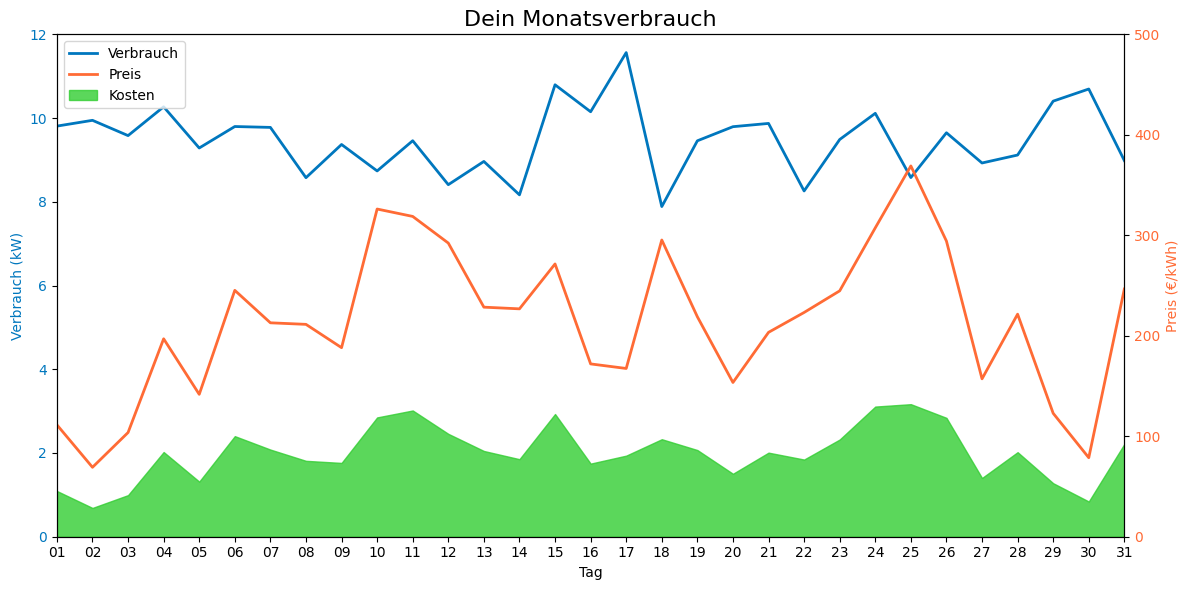

Consumption      293.8780
Costs          64093.8301
Preis           6620.2150
dtype: float64

In [106]:
mask = (df.index.year == 2022) & (df.index.month == 1)

wanted = df.loc[mask].copy()
wanted.Consumption /= 1000

Month = "February"

def get_costs_over_days(df):
    return df.groupby(df.index.date).agg(
        {"Consumption": "sum", "Costs": "sum", "Preis": "mean"}
    )
    

    
wanted = get_costs_over_days(wanted)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0])
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1])
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,500)
ax1.set_ylim(0,12)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
ax1.set_xlabel('Tag')
# Title
ax1.set_title(f"Dein Monatsverbrauch", fontsize=16)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left')


plt.tight_layout()
plt.savefig("imgs/HistoryEntwicklung.svg", bbox_inches = "tight")
plt.show()
wanted.sum()

In [107]:
mask = (df.index.year == 2022) & (df.index.month == 1)

wanted = df.loc[mask].copy()

    
wanted = get_costs_over_days(wanted)
wanted.index = pd.DatetimeIndex(wanted.index)
wanted = 

SyntaxError: invalid syntax (343429582.py, line 8)

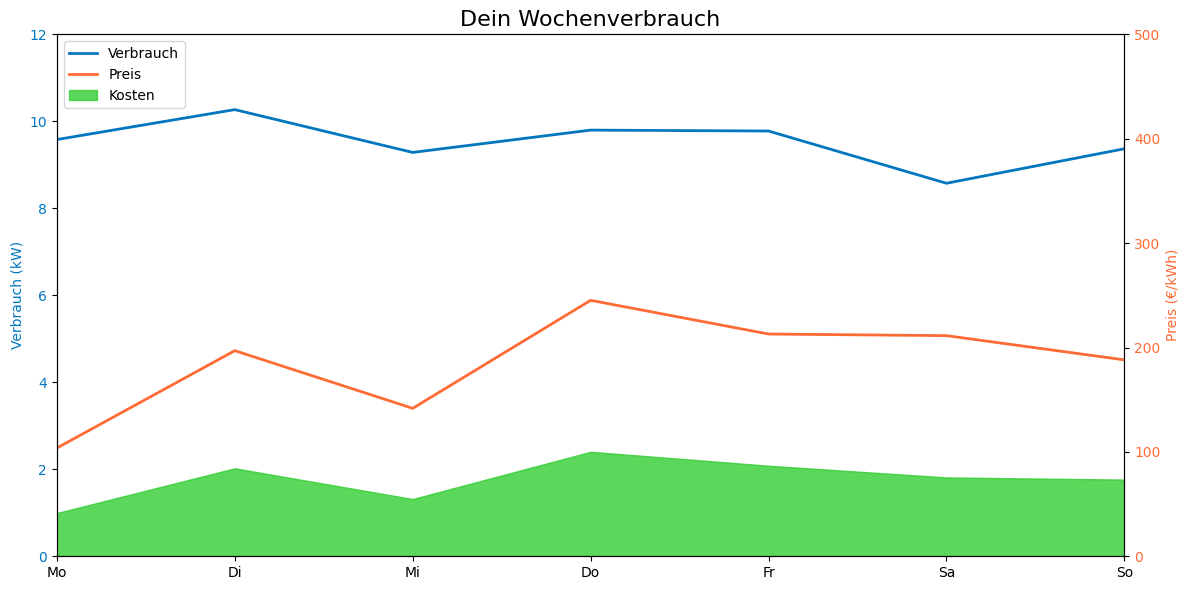

Consumption       66.655000
Costs          13129.474336
Preis           1300.019000
dtype: float64

In [108]:
mask = (df.index.year == 2022) & (df.index.month == 1)

wanted = df.loc[mask].copy()



wanted.Consumption /= 1000


def get_costs_over_days(df):
    return df.groupby(df.index.date).agg(
        {"Consumption": "sum", "Costs": "sum", "Preis": "mean"}
    )
    

    
wanted = get_costs_over_days(wanted)
wanted.index = pd.DatetimeIndex(wanted.index)
wanted = wanted.iloc[2:9]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0])
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1])
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,500)
ax1.set_ylim(0,12)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
# Setting up the x-axis
ax1.set_xticks(wanted.index)
ax1.set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%a'))


ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
# Title
ax1.set_title(f"Dein Wochenverbrauch", fontsize=16)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left')


plt.tight_layout()
plt.savefig("imgs/WochenEntwicklung.svg", bbox_inches = "tight")
plt.show()
wanted.sum()

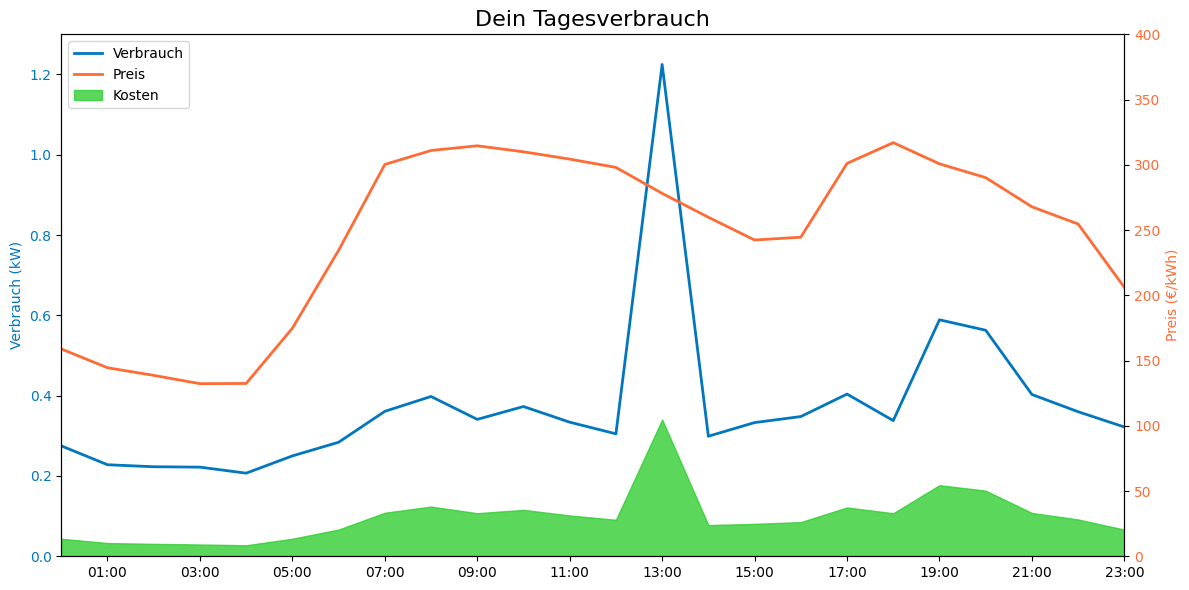

Production                                                    3786.0
Purchased                                                     7086.0
FeedIn                                                        1887.0
Consumption                                                    8.985
SelfConsumption                                               1899.0
Pred                                                             0.0
data               NormalNormalNormalNormalNormalNormalNormalNorm...
Preis                                                       5916.552
Costs                                                    2341.669512
Predicted Costs                                                  0.0
dtype: object

In [111]:
mask = df.index.date == datetime.date(2022, 1, 31)

wanted = df.loc[mask].copy()
wanted.Consumption /= 1000


last = wanted.index[-1]




fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0])
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1])
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,400)
ax1.set_ylim(0,1.3)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
# Setting up the x-axis
# ax1.set_xticks(wanted.index)
# ax1.set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%a'))


ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
# Title
ax1.set_title(f"Dein Tagesverbrauch", fontsize=16)

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left')
# Setting up the x-axis with hourly ticks
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


plt.tight_layout()
plt.savefig("imgs/TagesEntwicklung.svg", bbox_inches = "tight")
plt.show()
wanted.sum()

<Axes: xlabel='Dates'>

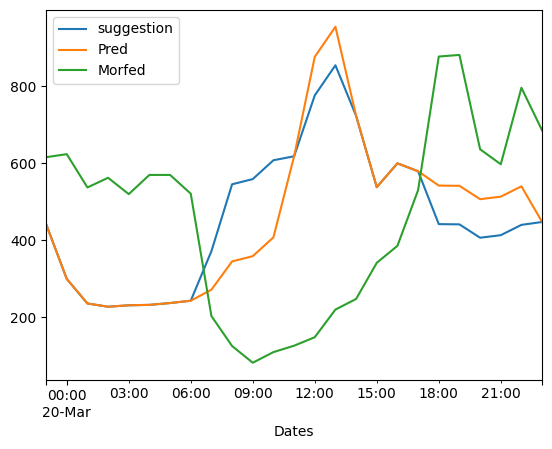

In [104]:
morfed = wanted["Pred"].copy()

morfed[8] += 100
morfed[9:12] += 200

morfed[13] -= 100
morfed[14] -= 100

morfed[19:24] -= 100


# morfed[10] += 500# Adding to 9 AM
# morfed[0] += 100# Adding to 9 AM
# morfed[11] -= 200# Adding to 9 AM
# morfed[12] += 100# Adding to 9 AM
# morfed[14] -= 200  # Removing from 12 PM
# morfed[20:23] -= 300/3  # Removing from 3 PM

wanted["suggestion"] = morfed

wanted[["suggestion","Pred", "Morfed"]].plot()

In [ ]:
vergangheit, zukubft

strompreis
verbrauch
und die geräte

advanced erklärungsplot


hellblau dunkelblau



In [100]:
wanted[["morfed","Pred", ]].sum()

morfed    11518.0809
Pred      11518.0809
dtype: float64

In [101]:
better =np.dot(wanted.morfed , wanted.Preis) / 1000
better

854.7870866709601

In [102]:
wanted["Predicted Costs"].sum()

914.92828667096